## Importing Packages

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import re

## Data Understanding

In [2]:
#Connect to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Data_directory
data_dir = '/content/drive/MyDrive/formalAndInformal/training_labeled.csv'
dataset = pd.read_csv(data_dir)

In [4]:
dataset.head(10)

,Subreddit,Original Sentence,Formal Sentence
0,antiwork,r/isthisanothersubifellfor,Is this another sub I fell for?
1,antiwork,Sounds like you’re working car sales persons s...,It appears that you are working a schedule sim...
2,antiwork,Boss watching too much Rupert on Ted Lasso.,"Boss is watching a lot of the show Ted Lasso, ..."
3,antiwork,Immature and racist who could have guessed sta...,"People can be immature and have prejudices, bu..."
4,antiwork,Reply “ you can get sued”.,It is possible to face legal action.
5,antiwork,“Specially” to the interns? LOL,"To the interns, this is especially for you! Ha..."
6,antiwork,"&gt;if **they** deem them No, the policy agree...",If it is determined that they do not agree wit...
7,antiwork,"Ah, we’re at the cult compound stage",We have arrived at the compound.
8,antiwork,"&gt; Decent people So, rare.",People of good character are not common.
9,antiwork,I promise thoes kids won’t be working,The children will not be employed here.


In [5]:
dataset["Original Sentence"][1]

'Sounds like you’re working car sales persons schedule'

In [49]:
dataset.shape

(2999, 3)

## Data Preprocessing

In [6]:
#remove source(first column)
df = dataset.iloc[:,1:]
df.head()

,Original Sentence,Formal Sentence
0,r/isthisanothersubifellfor,Is this another sub I fell for?
1,Sounds like you’re working car sales persons s...,It appears that you are working a schedule sim...
2,Boss watching too much Rupert on Ted Lasso.,"Boss is watching a lot of the show Ted Lasso, ..."
3,Immature and racist who could have guessed sta...,"People can be immature and have prejudices, bu..."
4,Reply “ you can get sued”.,It is possible to face legal action.


In [7]:
#new df for each column
informal_df = pd.DataFrame()
formal_df = pd.DataFrame()

# Add a 'text' column to each dataframe
informal_df['text'] = pd.DataFrame(df['Original Sentence'])
formal_df['text'] = pd.DataFrame(df['Formal Sentence'])

# Add a label column with value 0 represent informal
informal_df['label'] = 0

# Add a label column with value 1 represent formal
formal_df['label'] = 1

In [8]:
formal_df

,text,label
0,Is this another sub I fell for?,1
1,It appears that you are working a schedule sim...,1
2,"Boss is watching a lot of the show Ted Lasso, ...",1
3,"People can be immature and have prejudices, bu...",1
4,It is possible to face legal action.,1
...,...,...
2994,SK authorized the re-export of Krab SPGs conta...,1
2995,I would have a high level of confidence in US ...,1
2996,Your family could be in danger if a relative r...,1
2997,I'm starting to consider that Zapp Branagan ha...,1


In [9]:
#Combine the two dataframes
final_df = pd.concat([informal_df, formal_df], axis=0)
final_df = final_df.sample(frac=1).reset_index(drop=True)
final_df

,text,label
0,"Yesterday, a vote was held regarding AMC/APE a...",1
1,"The prince's back finally gave out, and it is ...",1
2,But ONLY for dear leaders. Cults have rules.,0
3,"On that person's CV, there may be a mention of...",1
4,“Just” or 20 years ago?,0
...,...,...
5993,You dont know shit. I live in Hungary and the ...,0
5994,People don't always enjoy attending to their o...,1
5995,"Knowledge81, account created 15 minutes after ...",0
5996,And Russia will defile the corpse purely out o...,0


In [10]:
#Change to lower case
final_df['text'] = final_df['text'].str.lower()

In [11]:
#remove url
def remove_url(text):
    url_pattern = re.sub(r'https?//\S+|www\.\S+', '', text)
    return url_pattern

final_df['text'] = final_df['text'].apply(remove_url)

In [12]:
#remove emojis
!pip install emoji
import emoji
def remove_emojis(text):
    return emoji.demojize(text)

final_df['text'] = final_df['text'].apply(remove_emojis)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 11.0 MB/s eta 0:00:00


In [13]:
#lemmatization
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

final_df['text'] = final_df['text'].apply(lemmatize_text)
final_df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,text,label
0,"yesterday, a vote wa held regarding amc/ape an...",1
1,"the prince's back finally gave out, and it is ...",1
2,but only for dear leaders. cult have rules.,0
3,"on that person's cv, there may be a mention of...",1
4,“just” or 20 year ago?,0


In [14]:
#train test split
from sklearn.model_selection import train_test_split
X = final_df['text']
y = final_df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [15]:
print("The shape of X_train is ", X_train.shape)
print("The shape of X_test is ", X_test.shape)

print("The shape of y_train is", y_train.shape)
print("The shape of y_test is", y_test.shape)


The shape of X_train is  (4798,)
The shape of X_test is  (1200,)
The shape of y_train is (4798,)
The shape of y_test is (1200,)


In [16]:
#tokenization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_word = 3000
embedding_dim = 64
trunc_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = max_word, oov_token = oov_tok)
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)
word_index = tokenizer.word_index

#sequencing
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)
max_length = 150

#padding
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post')

In [17]:
print("X_train_padded:")
print(X_train_padded)
print("\nX_test_padded:")
print(X_test_padded)

X_train_padded:
[[  11  134 2891 ...    0    0    0]
 [   1   44   17 ...    0    0    0]
 [  50   35  892 ...    0    0    0]
 ...
 [  22   29    1 ...    0    0    0]
 [ 137   27  230 ...    0    0    0]
 [  22   44  175 ...    0    0    0]]

X_test_padded:
[[ 237  232    1 ...    0    0    0]
 [  45    1   22 ...    0    0    0]
 [   2  291   24 ...    0    0    0]
 ...
 [  11   25  252 ...    0    0    0]
 [  21   17 1767 ...    0    0    0]
 [  11  138  194 ...    0    0    0]]


## Modelling

In [18]:
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
BiLSTM_model = tf.keras.Sequential([
      tf.keras.layers.Embedding(input_dim=max_word, output_dim=64, input_shape=(max_length,)),
      tf.keras.layers.Bidirectional(LSTM(32)),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(1, activation='sigmoid')])

BiLSTM_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
BiLSTM_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 150, 64)             │         192,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 64)                  │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 221,057 (863.50 KB)

 Trainable params: 221,057 (863.50 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

#Training Model
BiLSTM_history = BiLSTM_model.fit(X_train_padded, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data = (X_test_padded, y_test),
                    callbacks = [early_stopping],
                    verbose=1)

Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.6365 - loss: 0.6181 - val_accuracy: 0.8692 - val_loss: 0.3161
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8952 - loss: 0.2644 - val_accuracy: 0.8833 - val_loss: 0.2861
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9412 - loss: 0.1642 - val_accuracy: 0.8683 - val_loss: 0.3348
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9595 - loss: 0.1154 - val_accuracy: 0.8592 - val_loss: 0.4357
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9709 - loss: 0.0837 - val_accuracy: 0.8692 - val_loss: 0.4524


## Evaluation

In [20]:
predicted_results = BiLSTM_model.predict(X_test_padded)
print(predicted_results)

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
[[0.01421804]
 [0.05583671]
 [0.97900945]
 ...
 [0.18674502]
 [0.9968405 ]
 [0.0055457 ]]


In [41]:
y_pred = []
threshold_value = 0.4
for  i in predicted_results:
  current_val = i[0]
  if (current_val>=threshold_value):
    y_pred.append(1)
  else:
    y_pred.append(0)

In [42]:
# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
ans = y_pred
print('Accuracy Score',accuracy_score(y_test,ans)*100,'%')
print('Precision Macro Score',precision_score(y_test,ans,average = 'macro')*100,'%')
print('Recall_Score',recall_score(y_test,ans, average = 'macro')*100,'%')
print('F1_Score',f1_score(y_test,ans, average = 'macro')*100,'%')

Accuracy Score 88.5 %
Precision Macro Score 88.49260038171862 %
Recall_Score 88.50543727472063 %
F1_Score 88.49680466796332 %


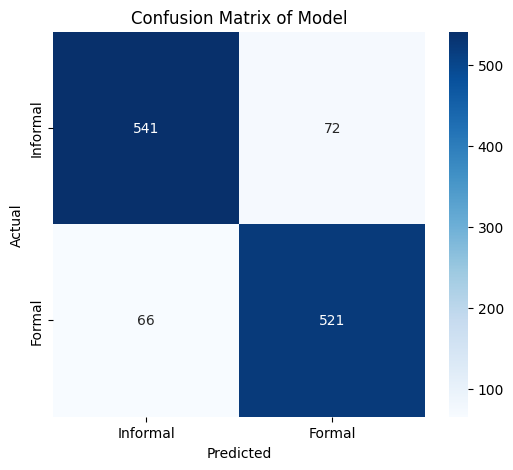

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Informal', 'Formal'],
            yticklabels=['Informal', 'Formal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Model')
plt.show()

In [44]:
inputs = ["we gotta move on, can't waste time anymore!"]
print(inputs)
testing_sequences = tokenizer.texts_to_sequences(inputs)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length, truncating=trunc_type,padding='post')
ans = BiLSTM_model.predict(testing_padded)
print(ans[0][0])

if (ans[0][0]>=threshold_value):
  print("Formal")
else:
  print("Informal")


["we gotta move on, can't waste time anymore!"]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
0.044896524
Informal


## Save

In [45]:
# save model
BiLSTM_model.save('/content/drive/MyDrive/formalAndInformal/best_model.h5')

In [47]:
import joblib

# Save the tokenizer
joblib.dump(tokenizer, '/content/drive/MyDrive/formalAndInformal/custom_tokenizer.joblib')

['/content/drive/MyDrive/formalAndInformal/custom_tokenizer.joblib']